<a href="https://colab.research.google.com/github/mrdo19111911/Split-algorithm/blob/main/Split_with_graph_input_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 import libraries

In [ ]:
!pip install numba=='0.55.1'
!pip install ortools
import math
import numpy as np
from numba import njit, types
from numba.typed import Dict
import random
import timeit
from itertools import permutations, combinations
import ortools
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import copy

     |████████████████████████████████| 3.3 MB 34.4 MB/s 
     |████████████████████████████████| 34.5 MB 12 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2
     |████████████████████████████████| 15.5 MB 24.3 MB/s 
     |████████████████████████████████| 1.0 MB 53.6 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


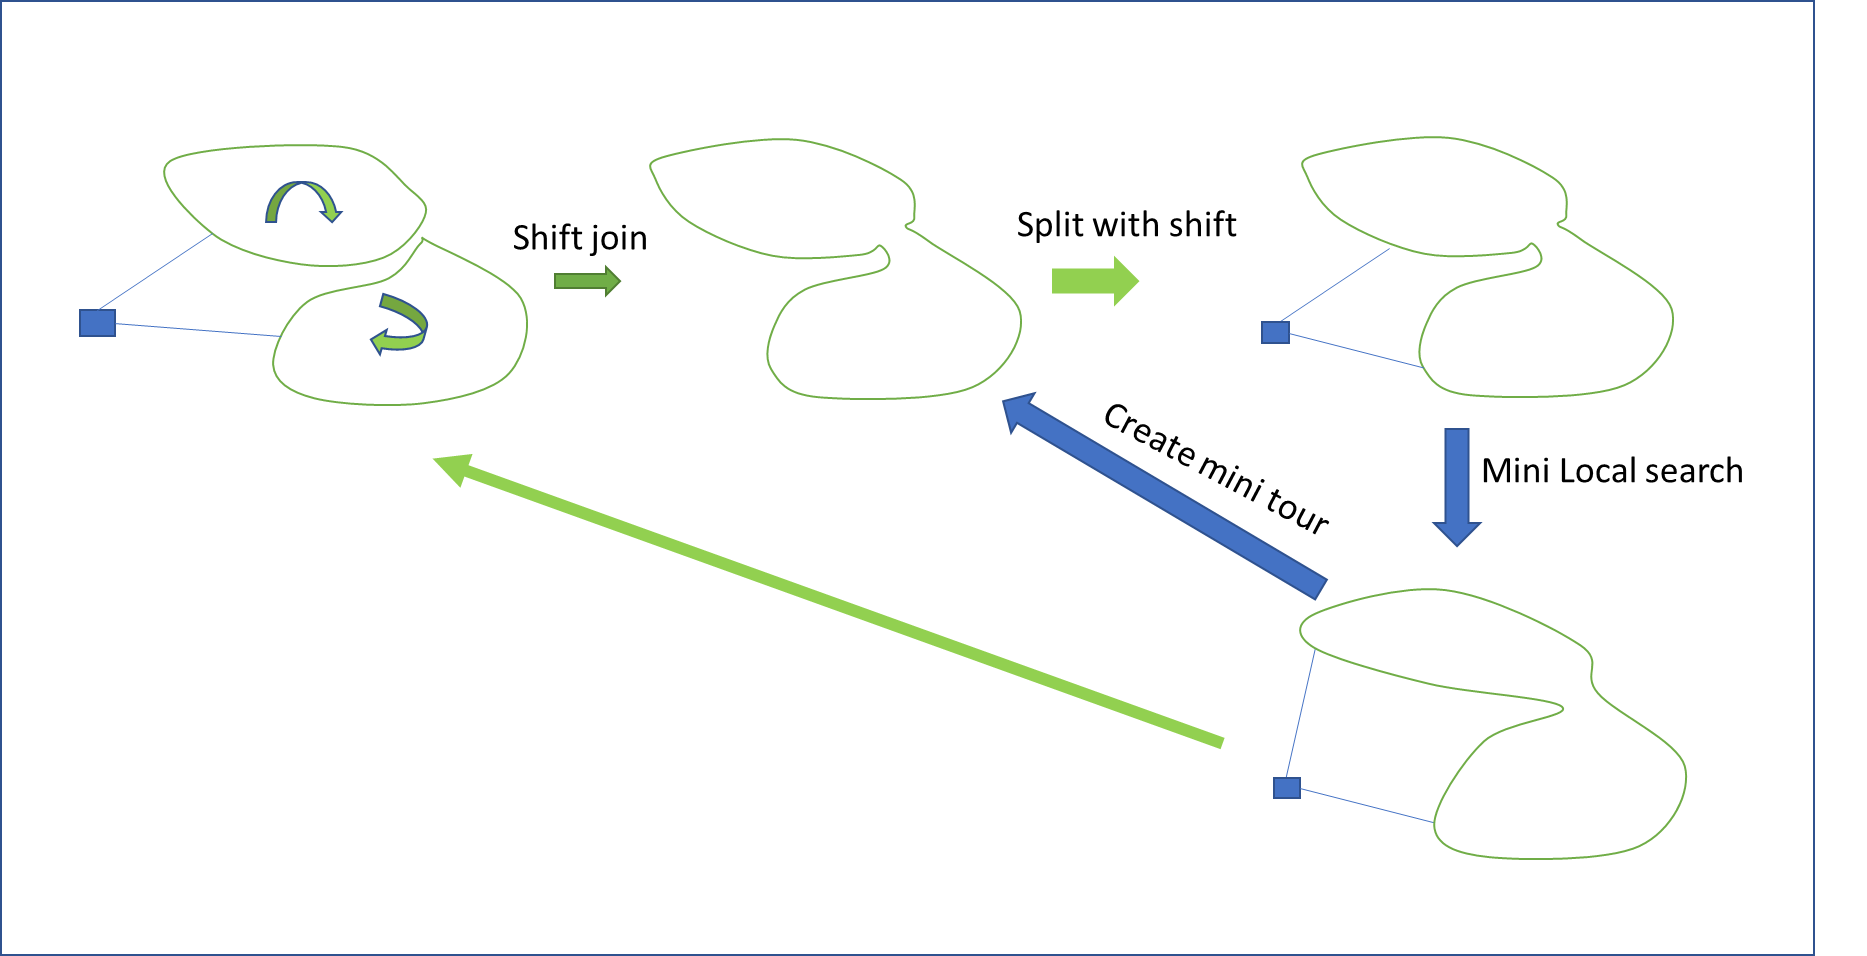

In [ ]:
# def create_data_model():
#     """Stores the data for the problem."""
#     data = {}
#     data['distance_matrix'] = distance_matrix
#     data['demands'] = demand
#     data['vehicle_capacities'] = [10000]*2+[5000]*3+[1500]*3
#     data['num_vehicles'] = 8
#     data['depot'] = 0
#     return data


# def print_solution(data, manager, routing, solution):
#     """Prints solution on console."""
#     print(f'Objective: {solution.ObjectiveValue()}')
#     total_distance = 0
#     total_load = 0
#     for vehicle_id in range(data['num_vehicles']):
#         index = routing.Start(vehicle_id)
#         plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
#         route_distance = 0
#         route_load = 0
#         while not routing.IsEnd(index):
#             node_index = manager.IndexToNode(index)
#             route_load += data['demands'][node_index]
#             plan_output += ' {0} Load({1}) -> '.format(node_index, route_load)
#             previous_index = index
#             index = solution.Value(routing.NextVar(index))
#             route_distance += routing.GetArcCostForVehicle(
#                 previous_index, index, vehicle_id)
#         plan_output += ' {0} Load({1})\n'.format(manager.IndexToNode(index),
#                                                  route_load)
#         plan_output += 'Distance of the route: {}m\n'.format(route_distance)
#         plan_output += 'Load of the route: {}\n'.format(route_load)
#         print(plan_output)
#         total_distance += route_distance
#         total_load += route_load
#     print('Total distance of all routes: {}m'.format(total_distance))
#     print('Total load of all routes: {}'.format(total_load))


# def main():
#     """Solve the CVRP problem."""
#     # Instantiate the data problem.
#     data = create_data_model()

#     # Create the routing index manager.
#     manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
#                                            data['num_vehicles'], data['depot'])

#     # Create Routing Model.
#     routing = pywrapcp.RoutingModel(manager)


#     # Create and register a transit callback.
#     def distance_callback(from_index, to_index):
#         """Returns the distance between the two nodes."""
#         # Convert from routing variable Index to distance matrix NodeIndex.
#         from_node = manager.IndexToNode(from_index)
#         to_node = manager.IndexToNode(to_index)
#         return data['distance_matrix'][from_node][to_node]

#     transit_callback_index = routing.RegisterTransitCallback(distance_callback)

#     # Define cost of each arc.
#     routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)


#     # Add Capacity constraint.
#     def demand_callback(from_index):
#         """Returns the demand of the node."""
#         # Convert from routing variable Index to demands NodeIndex.
#         from_node = manager.IndexToNode(from_index)
#         return data['demands'][from_node]

#     demand_callback_index = routing.RegisterUnaryTransitCallback(
#         demand_callback)
#     routing.AddDimensionWithVehicleCapacity(
#         demand_callback_index,
#         0,  # null capacity slack
#         data['vehicle_capacities'],  # vehicle maximum capacities
#         True,  # start cumul to zero
#         'Capacity')

#     # Setting first solution heuristic.
#     search_parameters = pywrapcp.DefaultRoutingSearchParameters()
#     search_parameters.first_solution_strategy = (
#         routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
#     search_parameters.local_search_metaheuristic = (
#         routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
#     search_parameters.time_limit.FromSeconds(3)

#     # Solve the problem.
#     solution = routing.SolveWithParameters(search_parameters)

#     # Print solution on console.
#     if solution:
#         print_solution(data, manager, routing, solution)


# if __name__ == '__main__':
#     main()

#2 utilities


In [ ]:
def permutation(veh_list):
    return list(set(list(permutations(veh_list))))

def all_bin(n):
    res = []
    for i in range(n):
        res.append(bin(i)[2:])
    return res

def find_all_subset(alist):
    res = []
    n = 2**len(alist)
    for _ in all_bin(n):
        mem = []
        for i in range(len(_)-1,-1,-1):
            if _[i] == '1':
                mem.append(alist[len(alist)-len(_)+i])
        res.append(tuple(mem))
    return res

def find_all_key(alist):
    res = set()
    for _ in find_all_subset(alist):
        for __ in permutation(_):
            res.add(__)
    res = list(res)
    res.sort(key = lambda x: len(x))
    return res

def sync(alist):
    res = np.zeros((len(alist),len(alist[-1])), dtype = "int64")
    for i in range(len(alist)):
        for j in range(    len(alist[-1])-1    , len(alist[-1]) - len(alist[i]) -1  ,-1):
            res[i][j]=alist[i][len(alist[-1]) - j -1]
    return res

@njit(fastmath=True)
def mapping(array):
    res = 0
    for i in range(len(array)):
        res += array[-1-i]*10**i
    return int(res)

In [ ]:
def check(check_tour, distance_matrix, demand): 
    total_distance = 0
    all_load = []
    for tour in check_tour:
        print(tour)
        load = 0
        for i in range(len(tour)):
            load+=demand[tour[i]]
            if i == 0:
                total_distance += distance_matrix[0][tour[i]]
            else:
                total_distance += distance_matrix[tour[i]][tour[i-1]]
        total_distance += distance_matrix[0][tour[-1]]
        all_load.append(load)

    print('total distance', total_distance)
    print('all load', all_load)
    print(sum(all_load))

#3 fake data

In [ ]:
# demand = [0,11,3,6,5,7,8,1,7,3,7,3,6]
# distance_matrix = [[0 for i in range(13)] for i in range(13)]
# config1 = [4,3,7,2,7,3,8,6,8,4,3,3]
# config2 = [4,5,10,9,14,12,16,11,5,3,5,6]
# for i in range(1,13):
#     distance_matrix[i-1][i] = config1[i-1]
# for i in range(1,13):
#     distance_matrix[0][i] = config2[i-1]
# for i in range(12):
#     for j in range(i+1,13):
#         distance_matrix[j][i] = distance_matrix[i][j]  
# n_location = 13

# capacity = 30
# graph_distance_matrix = [[math.inf for i in range(13)] for i in range(13)]
# for t in range(13):
#     load = 0
#     i = t+1
#     while i < n_location and load + demand[i] <= capacity:
#         load += demand[i]
#         if i == t+1:
#             cost = distance_matrix[0][i]
#         else:
#             cost += distance_matrix[i-1][i]
#         graph_distance_matrix[t][i] = cost + distance_matrix[i][0]
#         i+=1

# graph_distance_matrix=np.asarray(graph_distance_matrix,dtype='float64')
# input testing


n_location = 11
# demand = [0,11,3,6,5,7,8,1,7,3,7,3,6]
demand = [0]+[random.randint(10,100) for i in range(n_location-1)]
capacity = 250
coordinate = []
for i in range(n_location):
    x, y = random.random()*10000,random.random()*10000
    coordinate.append((x,y))

distance_matrix = [[0 for i in range(n_location)] for i in range(n_location)]
for i in range(n_location):
    for j in range(n_location):
        distance_matrix[i][j] = round(((coordinate[i][0]-coordinate[j][0])**2 + (coordinate[i][1]-coordinate[j][1])**2)**0.5)

#4 giant tour from TSP - ORtools

In [ ]:
"""Simple Travelling Salesperson Problem (TSP) between cities."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

start = timeit.default_timer()
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = distance_matrix  # yapf: disable
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} miles'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}miles\n'.format(route_distance)


def get_solution(manager, routing, solution):
    index = routing.Start(0)
    res = []
    route_distance = 0
    while not routing.IsEnd(index):
        res.append(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    res.append(manager.IndexToNode(index))
    return res #, route_distance


def TSP():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    search_parameters.local_search_metaheuristic = (
        routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
    search_parameters.time_limit.FromSeconds(5)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        return get_solution(manager, routing, solution)
end = timeit.default_timer()
print(end-start)

solution = TSP()
giant_tour = np.asarray(solution[:-1])

0.00046451900000477053


In [ ]:
giant_tour = np.asarray([ 0,  9,  4,  1,  2,  6,  7, 10,  5,  8,  3], np.int32)

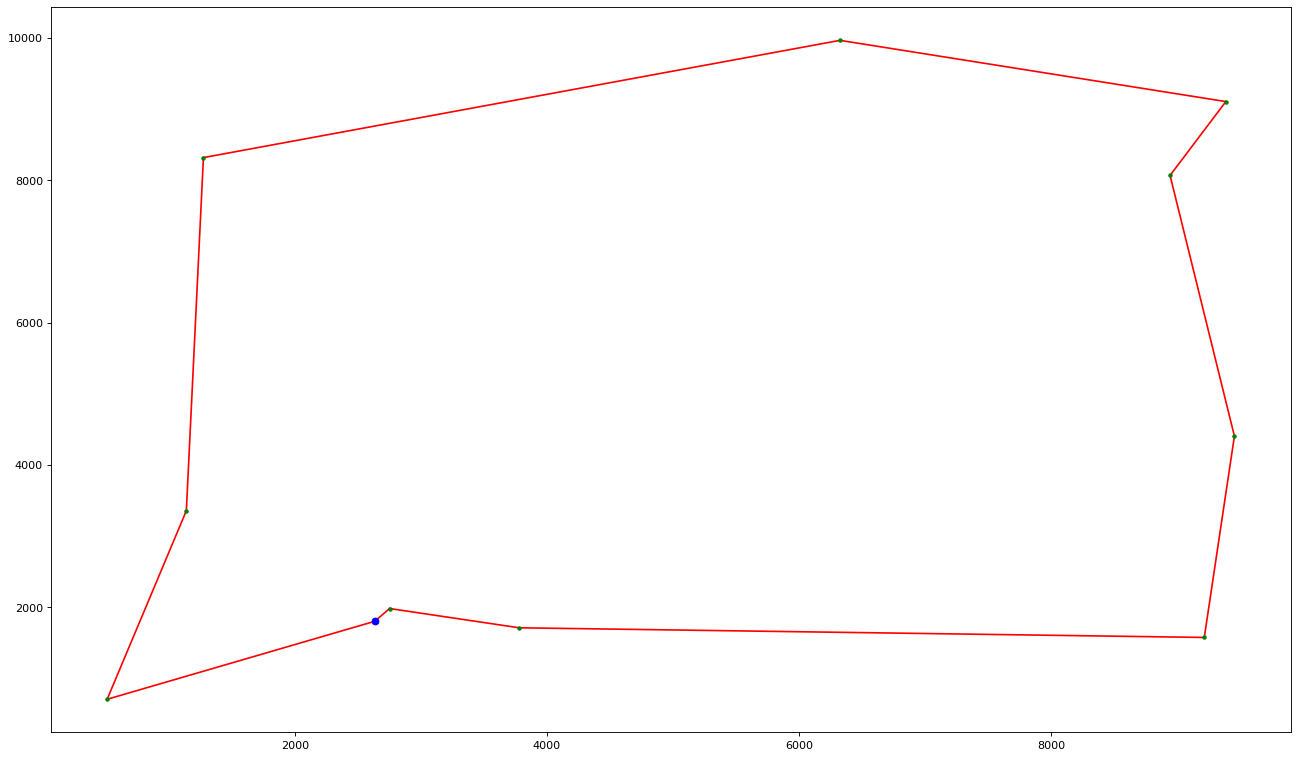

In [ ]:
figure(figsize=(20, 12), dpi=80)
for i in range(len(solution)-1):
    x = solution[i]
    y = solution[i+1]
    plt.plot([    coordinate[x][0],coordinate[y][0]     ],[coordinate[x][1],coordinate[y][1]], 'r')
plt.plot(*coordinate[0],marker='o',color = 'b')
for i in range(1,len(solution)-1):
    plt.plot(*coordinate[i],marker='.',color = 'g')

In [ ]:
def create_graph_distance_matrix(capacity, demand, giant_tour, distance_matrix):
    graph_distance_matrix = [[math.inf for i in range(len(distance_matrix))] for i in range(len(distance_matrix))]
    for t in range(len(giant_tour)):
        load = 0
        i = t+1
        while i < n_location and load + demand[giant_tour[i]] <= capacity:
            load += demand[giant_tour[i]]
            if i == t+1:
                cost = distance_matrix[0][giant_tour[i]]
            else:
                cost += distance_matrix[giant_tour[i-1]][giant_tour[i]]
            graph_distance_matrix[giant_tour[t]][giant_tour[i]] = cost + distance_matrix[giant_tour[i]][0]
            i+=1
    return np.asarray(graph_distance_matrix,dtype='float64')

In [ ]:
# giant_tour = np.asarray([0,], dtype = 'int64')
graph_distance_matrix = create_graph_distance_matrix(capacity, demand, giant_tour, distance_matrix)

In [ ]:
type(graph_distance_matrix[0][0])

numpy.float64

In [ ]:
@njit(fastmath = True)
def unlimited_homogeneous_veh_split(graph_distance_matrix, giant_tour):
    n_location = len(graph_distance_matrix)
    p = np.asarray([math.inf for i in range(n_location)],dtype='float64')
    p[0]=0
    pred = np.asarray([-1 for i in range(n_location)],dtype='int64')
    for t in range(n_location):
        i = t+1
        while i < n_location and graph_distance_matrix[giant_tour[t]][giant_tour[i]] < math.inf:
            if p[giant_tour[t]] + graph_distance_matrix[giant_tour[t]][giant_tour[i]] < p[giant_tour[i]]:
                p[giant_tour[i]] = p[giant_tour[t]] + graph_distance_matrix[giant_tour[t]][giant_tour[i]]
                pred[i] = t
            i += 1
    return pred, p, giant_tour
start = timeit.default_timer()
for i in range(10000):
    unlimited_homogeneous_veh_split(graph_distance_matrix, giant_tour)
end = timeit.default_timer()
end - start

1.4060409129999982

In [ ]:
def build_split_solution_unlimited_homogeneous(pred,p, giant_tour):
    res = {}
    res['total cost']=p[giant_tour[-1]]
    checkpoint = []
    location = len(pred)-1
    checkpoint.append(location)
    while location != 0:
        checkpoint.append(pred[location])
        location = pred[location]
    checkpoint=checkpoint[-1::-1]
    res['checkpoint']=checkpoint
    split_tour = []
    for i in range(1,len(checkpoint)):
        temp_list = []
        temp_point = checkpoint[i-1]
        for j in range(checkpoint[i-1]+1,checkpoint[i]+1):
            temp_list.append(giant_tour[j])
        split_tour.append(temp_list)
    res['tour'] = split_tour

    return res

check(build_split_solution_unlimited_homogeneous(*unlimited_homogeneous_veh_split(graph_distance_matrix, giant_tour))['tour'],distance_matrix,demand)


[9, 4, 1, 2, 6]
[7, 10, 5, 8, 3]
total distance 63644
all load [224, 244]
468


In [ ]:
tours = build_split_solution_unlimited_homogeneous(*unlimited_homogeneous_veh_split(graph_distance_matrix, giant_tour))['tour']

In [ ]:
def join(tours, distance_matrix):
    start = []
    end = []
    for tour in tours:
        start.append(tour[0])
        end.append(tour[1])
    res = []
    i = 0
    while len(start)>1:
        temp_distance = 10**9
        temp_end = 0
        for j in range(len(start)):
            if i == j:
                pass
            else:
                if distance_matrix[start[i]][end[j]] < temp_distance:
                    temp_distance = distance_matrix[start[i]][end[j]]
                    temp_end = j
        res.append(i)
        start.pop(i)
        end.pop(i)
        i = j
    return res


In [ ]:
# join(tours,distance_matrix)

In [ ]:
@njit(fastmath=True)
def limited_homogeneous_veh_split(graph_distance_matrix, n_veh, giant_tour):
    n_location = len(graph_distance_matrix)
    p = np.asarray([[math.inf for i in range(n_location)] for i in range(n_veh+1)],dtype='float64')
    p[0][0] = 0
    pred = np.asarray([[-1 for i in range(n_location)] for i in range(n_veh+1)],dtype='int64')
    for k in range(1,n_veh+1):
        for t in range(k-1, n_location):
            i = t+1
            while i < n_location and graph_distance_matrix[giant_tour[t]][giant_tour[i]] < math.inf:
                if p[k-1][giant_tour[t]] + graph_distance_matrix[giant_tour[t]][giant_tour[i]] < p[k][giant_tour[i]]:
                    p[k][giant_tour[i]] = p[k-1][giant_tour[t]] + graph_distance_matrix[giant_tour[t]][giant_tour[i]]
                    pred [k][i] = t
                i += 1
    return pred, p, giant_tour

limited_homogeneous_veh_split(graph_distance_matrix,70, giant_tour)

(array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1],
        [-1, -1,  1,  1,  3,  3,  3,  3,  5,  5,  5],
        [-1, -1, -1,  2,  3,  3,  3,  3,  5,  5,  5],
        [-1, -1, -1, -1,  3,  3,  3,  3,  5,  5,  5],
        [-1, -1, -1, -1, -1,  4,  4,  4,  5,  5,  5],
        [-1, -1, -1, -1, -1, -1,  5,  5,  5,  5,  5],
        [-1, -1, -1, -1, -1, -1, -1,  6,  6,  6,  6],
        [-1, -1, -1, -1, -1, -1, -1, -1,  7,  8,  9],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1,  8,  9],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  9],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1,

In [ ]:
def build_split_solution_limited_veh(pred, p, giant_tour):
    min_cost = math.inf
    optimal_n_veh = math.inf
    for i in range(len(p)):
        if p[i][giant_tour[-1]] < min_cost:
            min_cost = p[i][giant_tour[-1]]
            optimal_n_veh = i
    res = {}
    res['total cost'] = min_cost
    res['n_veh'] = optimal_n_veh
    checkpoint = []
    location = len(pred[0])-1
    checkpoint.append(location)
    for count in range(optimal_n_veh,0,-1):
        checkpoint.append(pred[count][location])
        location = pred[count][location]        
    checkpoint=checkpoint[-1::-1]
    res['checkpoint']=checkpoint
    split_tour = []
    for i in range(1,len(checkpoint)):
        temp_list = []
        temp_point = checkpoint[i-1]
        for j in range(checkpoint[i-1]+1,checkpoint[i]+1):
            temp_list.append(giant_tour[j])
        split_tour.append(temp_list)
    res['tour'] = split_tour
    return res

build_split_solution_limited_veh(*limited_homogeneous_veh_split(graph_distance_matrix,200,giant_tour))

{'checkpoint': [0, 5, 10],
 'n_veh': 2,
 'total cost': 63644.0,
 'tour': [[9, 4, 1, 2, 6], [7, 10, 5, 8, 3]]}

In [ ]:
# print(demand)
# build_split_solution_limited_veh(*limited_homogeneous_veh_split(graph_distance_matrix,7,giant_tour))

In [ ]:
check(build_split_solution_limited_veh(*limited_homogeneous_veh_split(graph_distance_matrix,7,giant_tour))['tour'],distance_matrix,demand)

[9, 4, 1, 2, 6]
[7, 10, 5, 8, 3]
total distance 63644
all load [224, 244]
468


In [ ]:
capacity_list = [i*500 for i in range(1,8)]
veh_order = np.asarray(list(range(1,8)),dtype = 'int64')
def create_graph_distance_matrices(capacity_list, demand, giant_tour, distance_matrix):
    graph_distance_matrices = []
    for i in range(len(capacity_list)):
        member = create_graph_distance_matrix(capacity_list[i], demand, giant_tour, distance_matrix)
        graph_distance_matrices.append(member)
    graph_distance_matrices = np.asarray(graph_distance_matrices, dtype = 'float64')
    return graph_distance_matrices


#test case
graph_distance_matrices = create_graph_distance_matrices(capacity_list, demand, giant_tour, distance_matrix)
# graph_distance_matrices

In [ ]:
 @njit(fastmath=True)
def ordered_heterogeneous_split(graph_distance_matrices, veh_order, giant_tour):
    n_location = len(graph_distance_matrices[0])
    n_veh = len(veh_order)
    p = np.asarray([[math.inf for i in range(n_location)] for i in range(n_veh+1)],dtype='float64')
    p[0][0] = 0
    pred = np.asarray([[-1 for i in range(n_location)] for i in range(n_veh+1)],dtype='int64')
    best_cost = math.inf
    best_veh = 0
    for k in range(1,n_veh+1):
        for t in range(k-1, n_location):
            i = t+1
            while i < n_location and graph_distance_matrices[veh_order[k-1]-1][giant_tour[t]][giant_tour[i]] < math.inf:
                if p[k-1][giant_tour[t]] + graph_distance_matrices[veh_order[k-1]-1][giant_tour[t]][giant_tour[i]] < p[k][giant_tour[i]]:
                    p[k][giant_tour[i]] = p[k-1][giant_tour[t]] + graph_distance_matrices[veh_order[k-1]-1][giant_tour[t]][giant_tour[i]]
                    pred [k][i] = t
                i += 1
        if p[k][giant_tour[-1]] < best_cost:
            best_cost = p[k][giant_tour[-1]]
            best_veh = k
    return pred, p, giant_tour

In [ ]:
check(build_split_solution_limited_veh(*ordered_heterogeneous_split(graph_distance_matrices, veh_order, giant_tour))['tour'],distance_matrix,demand)

[9, 4, 1, 2, 6, 7, 10, 5, 8, 3]
total distance 59795
all load [468]
468


In [ ]:
def heterogeneous_split(all_veh, graph_distance_matrices, giant_tour):
    float_array = types.float64[:,:]
    int_array = types.int64[:,:]
    tuple_type = types.UniTuple(types.float64, len(all_veh))
    key_list = sync(find_all_key(all_veh))
    
    @njit(fastmath = True, cache = True)
    def helper_heterogeneous_split(key_list, graph_distance_matrices, giant_tour):
        n_location = len(graph_distance_matrices[0])
        n_veh = len(key_list[-1])
        mem_p = Dict.empty(
            key_type=types.int64,
            value_type=float_array,
        )
        mem_pred = Dict.empty(
            key_type=types.int64,
            value_type=int_array,
        )
        p = np.full((n_veh+1,n_location), np.inf, dtype = 'float64')
        p[0][0] = 0
        pred = np.full((n_veh+1,n_location), -1, dtype = 'int64')
        veh_order = np.zeros(len(key_list[0]), dtype = 'int64')
        for _ in key_list:
            mem_p[mapping(_)] = p.copy()
        for _ in key_list:
            mem_pred[mapping(_)] = pred.copy()
        best_cost = 10**9
        best_veh = 0

        for _ in key_list[1:]:
            __ = np.concatenate((np.zeros(1, dtype = 'int64'),_[:-1]),axis = 0)
            for i in range(n_veh+1):
                for j in range(n_location):
                    mem_p[mapping(_)][i][j] = mem_p[mapping(__)][i][j]
                    mem_pred[mapping(_)][i][j] = mem_pred[mapping(__)][i][j]
            k = 0
            for item in _:
                if item != 0:
                    k+=1
            
            for t in range(k-1, n_location):
                i = t+1
                while i < n_location and graph_distance_matrices[_[-1]-1][giant_tour[t]][giant_tour[i]] < math.inf:
                    if mem_p[mapping(_)][k-1][giant_tour[t]] + graph_distance_matrices[_[-1]-1][giant_tour[t]][giant_tour[i]] < mem_p[mapping(_)][k][giant_tour[i]]:
                        mem_p[mapping(_)][k][giant_tour[i]] = mem_p[mapping(_)][k-1][giant_tour[t]] + graph_distance_matrices[_[-1]-1][giant_tour[t]][giant_tour[i]]
                        mem_pred[mapping(_)][k][i] = t
                    i += 1

            for i in range(len(mem_p[mapping(_)])):
                if mem_p[mapping(_)][i][giant_tour[-1]] < best_cost:
                    best_cost = mem_p[mapping(_)][i][giant_tour[-1]]
                    best_veh = i
                    p, pred, veh_order = mem_p[mapping(_)], mem_pred[mapping(_)], _
        return pred, p, best_veh, veh_order, giant_tour
    return helper_heterogeneous_split(key_list, graph_distance_matrices, giant_tour)

In [ ]:
def build_split_solution_heterogeneous(pred,p,best_veh,veh_order, giant_tour):
    res = build_split_solution_limited_veh(pred,p,giant_tour)
    res['vehicle used']=veh_order[-best_veh:]
    return res


S = heterogeneous_split(veh_order, graph_distance_matrices, giant_tour)

In [ ]:
t1= timeit.default_timer()
S1 = heterogeneous_split([1,2,3], graph_distance_matrices, giant_tour)
t2 = timeit.default_timer()
t2-t1

0.028578045000017482

In [ ]:
build_split_solution_heterogeneous(*S)

{'checkpoint': [0, 10],
 'n_veh': 1,
 'total cost': 59795.0,
 'tour': [[9, 4, 1, 2, 6, 7, 10, 5, 8, 3]],
 'vehicle used': array([2])}

In [ ]:
check(build_split_solution_heterogeneous(*S)['tour'],distance_matrix,demand)

[9, 4, 1, 2, 6, 7, 10, 5, 8, 3]
total distance 59795
all load [468]
468


In [ ]:
@njit(fastmath=True)
def unlimited_heterogeneous_split(graph_distance_matrices):
    n_location = len(graph_distance_matrix[0])
    p = np.asarray([math.inf for i in range(n_location)],dtype='float64')
    p[0]=0
    pred = np.asarray([-1 for i in range(n_location)],dtype='int64')
    for t in range(n_location):
        i = t+1
        for graph in graph_distance_matrices:
            while i < n_location and graph[t][i] < math.inf:
                if p[t] + graph[t][i] < p[i]:
                    p[i] = p[t] + graph[t][i]
                    pred[i] = t
                i += 1
    return pred, p

In [ ]:
# @njit(fastmath=True)
def greedy_heterogeneous_split(graph_distance_matrices, veh_order, limit_iteration = 10**6):
    a_list = permutation(veh_order)
    best_cost = math.inf
    for i in range(limit_iteration):
        test = random.randint(1,len(a_list)-1)
        cost = build_split_solution_limited_veh(*ordered_heterogeneous_split(graph_distance_matrices, a_list[test]))['total cost']
        if cost < best_cost:
            best_cost = cost
    return best_cost


In [ ]:

def create_data_model_VRP():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = distance_matrix
    data['demands'] = demand
    data['vehicle_capacities'] = capacity_list
    data['num_vehicles'] = 7
    data['depot'] = 0
    return data


def print_solution_VRP(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    total_distance = 0
    total_load = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        route_load = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data['demands'][node_index]
            plan_output += ' {0} Load({1}) -> '.format(node_index, route_load)
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += ' {0} Load({1})\n'.format(manager.IndexToNode(index),
                                                 route_load)
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        plan_output += 'Load of the route: {}\n'.format(route_load)
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
    print('Total distance of all routes: {}m'.format(total_distance))
    print('Total load of all routes: {}'.format(total_load))


def main_VRP():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model_VRP()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)


    # Add Capacity constraint.
    def demand_callback(from_index):
        """Returns the demand of the node."""
        # Convert from routing variable Index to demands NodeIndex.
        from_node = manager.IndexToNode(from_index)
        return data['demands'][from_node]

    demand_callback_index = routing.RegisterUnaryTransitCallback(
        demand_callback)
    routing.AddDimensionWithVehicleCapacity(
        demand_callback_index,
        0,  # null capacity slack
        data['vehicle_capacities'],  # vehicle maximum capacities
        True,  # start cumul to zero
        'Capacity')

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    search_parameters.local_search_metaheuristic = (
        routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
    search_parameters.time_limit.FromSeconds(1)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution_VRP(data, manager, routing, solution)


main_VRP()

Objective: 32955
Route for vehicle 0:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Route for vehicle 1:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Route for vehicle 2:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Route for vehicle 3:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Route for vehicle 4:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Route for vehicle 5:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Route for vehicle 6:
 0 Load(0) ->  2 Load(11) ->  6 Load(72) ->  7 Load(93) ->  4 Load(103) ->  10 Load(187) ->  3 Load(217) ->  5 Load(313) ->  8 Load(326) ->  1 Load(405) ->  9 Load(468) ->  0 Load(468)
Distance of the route: 32955m
Load of the route: 468

Total distance of all routes: 32955m
Total load of all routes: 468


In [ ]:
def swap(a_list, selected_index, n_veh):
    if len(a_list) < n_veh:
        a_list += [[]]*(n_veh - len(a_list))
    res = copy.deepcopy(a_list)
    temp = res[selected_index[0]]
    for i in range(len(selected_index)-1):
        res[selected_index[i]] = res[selected_index[i+1]]
    res[selected_index[-1]] = temp
    return res

In [ ]:
def concat_giant_tour(tours):
    res = []
    for tour in tours:
        res += tour
    return res

In [ ]:
graph_distance_matrices = create_graph_distance_matrices(capacity_list, demand, giant_tour,distance_matrix)
solution = ordered_heterogeneous_split(graph_distance_matrices, veh_order, giant_tour)
detail = build_split_solution_limited_veh(*solution)
detail['total cost']
tours = detail['tour']

In [ ]:
iterations = 100
best_cost = detail['total cost']
for i in range(iterations):
    selected_index = random.sample(range(len(veh_order)),4)
    temp_veh_order = np.asarray(swap(veh_order,selected_index,len(capacity_list)),dtype='int64')
    temp_tours = swap(tours,selected_index,len(capacity_list))
    temp_giant_tour = np.asarray([0]+concat_giant_tour(tours),dtype='int64')
    temp_graph_distance_matrices = create_graph_distance_matrices(capacity_list, demand, temp_giant_tour,distance_matrix)
    candidate = ordered_heterogeneous_split(temp_graph_distance_matrices, veh_order, giant_tour)
    temp_detail = build_split_solution_limited_veh(*candidate)

    candidate_cost = temp_detail['total cost']
    if best_cost > candidate_cost:
        best_cost = candidate_cost
        veh_order = temp_veh_order
        tours = temp_tours

In [ ]:
# def neighborhood_seach(step, rd = False, iteration = 10**3):
